## Index for PCA_NUTS4.ipynb code

Description: View of tendencies in the data of different variables, merged and run a PCA and regression analysis

### 1. Preparation of the data for NUTS 4 analysis
   - Load the data
   - Add the names of the regions NUTS2 to the data

### 2. Analysis of the Education data
   - Analysis of the different behavior of the education by region
   - Plots that show differences

### 3. Analysis of the Labour
   - Anlysis of the different behavior of the labour by region
   - Plots that show differences

### 4. Analysis of the Production
   - Anlysis of the different behavior of the labour by region
   - Plots that show differences

### 5. Analysis of the Permanent Crops
   - Anlysis of the different behavior of the labour by region
   - Plots that show differences

### 6. Analysis of the Temporary Crops
   - Anlysis of the different behavior of the labour by region
   - Plots that show differences

### 7.  Merging dataframes of the sections 2-6
   - Prepare the different dataframes to merge into only one

### 8. Running a PCA with the dataframe from section 7 
   - Run a principal componet analysis of the all data to find especific tendencies

### 9. Run a analysis of the Production vs Education
   - Make OLS Regression Results between the variables

### 10. Run analysis of socio-economic indicators vs avg_area_hold
   - Make OLS Regression Results between the variables
-----------------------------------------------------------------------------------------


## 1. Preparation of the data for NUTS 4 analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from region_colors import region_colors

In [2]:
permcrop4_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS4_2019.csv', sep=",")
tempcrop4_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS4_2019.csv', sep=",")
education4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
labour4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
prod4_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")

In [3]:
all_dfs = [permcrop4_df, tempcrop4_df, education4_df, labour4_df, prod4_df]

def map_value(value):
    digits = str(value)[:2]
    if digits == '11':
        return 'Norte'
    elif digits == '15':
        return 'Algarve'
    elif digits == '16':
        return 'Centro'
    elif digits == '17':
        return 'Lisboa'
    elif digits == '18':
        return 'Alentejo'
    elif digits == '20':
        return 'Açores'
    elif digits == '30':
        return 'Madeira'
    else:
        return '-'

for df in all_dfs:
    df['NUTS2_region'] = df['NutsID'].apply(map_value)
    print(df['NUTS2_region'].unique())

['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']


In [4]:
prod4_df['NUTS2_region'].unique()

array(['Norte', 'Algarve', 'Centro', 'Lisboa', 'Alentejo', 'Açores',
       'Madeira'], dtype=object)

## 2. Analysis of the Education data

In [5]:
education4_df.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte


In [6]:
education4_df['el.education_level'].fillna('None', inplace=True)

In [7]:
ed_no_totals = education4_df[education4_df['el.education_level'] != 'Total'].copy()
ed_totals = education4_df[education4_df['el.education_level'] == 'Total'].copy()

In [8]:
ed_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte


In [9]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = ed_totals[ed_totals['NutsID'] == id]['e.value'].values[0]
    if total == 0:
        return None
    return round((value / total) * 100, 2)

In [10]:
ed_no_totals.loc[:, 'ed_level_perc'] = ed_no_totals.apply(ed_percentage, axis=1)

In [11]:
ed_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.99
309,1111602,Caminha,4,2019,141,None,Norte,14.57
310,1111603,Melgaço,4,2019,346,None,Norte,14.66
311,1111604,Monção,4,2019,616,None,Norte,14.19
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.19


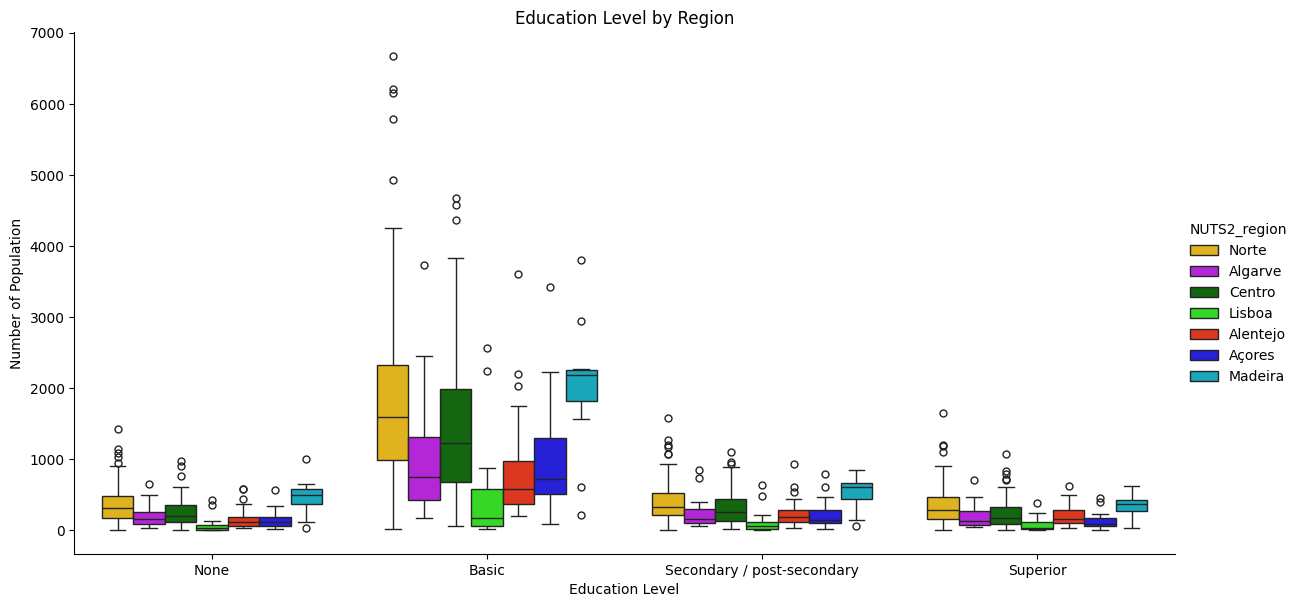

In [12]:
sns.catplot(
    data=ed_no_totals,
    x="el.education_level",
    y="e.value",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2,
    palette=region_colors
)
plt.title('Education Level by Region')
plt.xlabel('Education Level')
plt.ylabel('Number of Population')
plt.show()

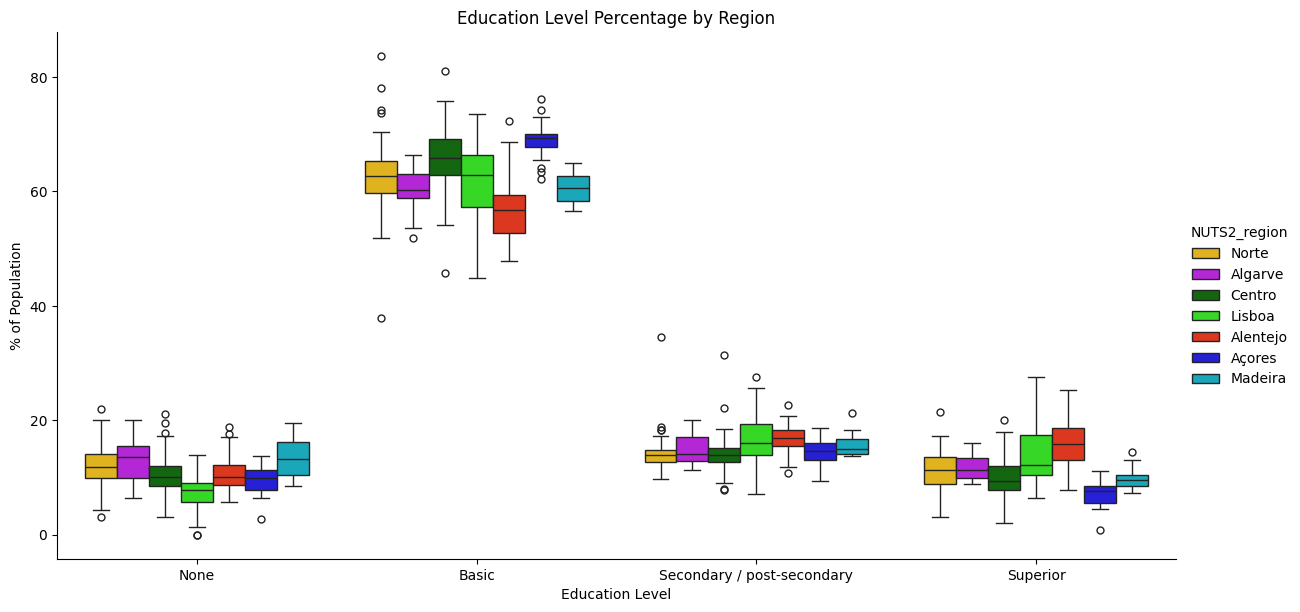

In [13]:
sns.catplot(
    data=ed_no_totals,
    x="el.education_level",
    y="ed_level_perc",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2,
    palette=region_colors
)
plt.title('Education Level Percentage by Region')
plt.xlabel('Education Level')
plt.ylabel('% of Population')
plt.show()

In [14]:
ed_none_basic = ed_no_totals[ed_no_totals['el.education_level'].isin(['None', 'Basic'])]
ed_nb_sum = ed_none_basic.groupby(['NutsID', 'NUTS2_region'])['ed_level_perc'].sum().reset_index()
ed_nb_sum.rename(columns={'ed_level_perc': 'none_basic_perc'}, inplace=True)

In [15]:
ed_nb_sum.describe()

,none_basic_perc
count,308.000000
mean,73.547792
std,6.481686
min,44.830000
25%,69.942500
50%,74.550000
75%,78.012500
max,90.030000


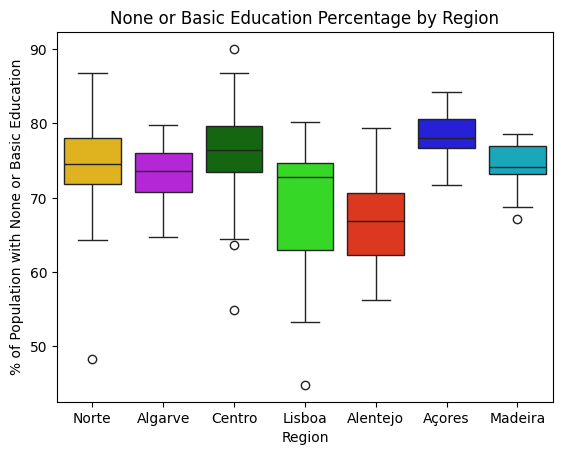

In [16]:
sns.boxplot(
    data=ed_nb_sum,
    x="NUTS2_region",
    y="none_basic_perc",
    hue="NUTS2_region",
    palette=region_colors
)
plt.title('None or Basic Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with None or Basic Education')
plt.show()

In [17]:
ed_nb_region_medians = ed_nb_sum.groupby('NUTS2_region')['none_basic_perc'].median().reset_index()
ed_nb_region_medians

,NUTS2_region,none_basic_perc
0,Alentejo,66.895
1,Algarve,73.650
2,Açores,78.070
3,Centro,76.470
4,Lisboa,72.845
5,Madeira,74.120
6,Norte,74.510


In [18]:
ed_nb_region_means = ed_nb_sum.groupby('NUTS2_region')['none_basic_perc'].mean().reset_index()
ed_nb_region_means

,NUTS2_region,none_basic_perc
0,Alentejo,67.422759
1,Algarve,73.235625
2,Açores,78.418421
3,Centro,76.130800
4,Lisboa,68.744444
5,Madeira,74.165455
6,Norte,74.583488


In [19]:
ed_secondary_plus = ed_no_totals[ed_no_totals['el.education_level'].isin(['Secondary / post-secondary', 'Superior'])]
ed_sp_sum = ed_secondary_plus.groupby(['NutsID', 'region_name', 'NUTS2_region'])['ed_level_perc'].sum().reset_index()
ed_sp_sum.rename(columns={'ed_level_perc': 'secondary_plus_perc'}, inplace=True)

In [20]:
ed_sp_sum.describe()

,secondary_plus_perc
count,308.000000
mean,26.452078
std,6.481429
min,9.980000
25%,21.995000
50%,25.445000
75%,30.057500
max,55.180000


In [21]:
ed_split_perc = ed_sp_sum

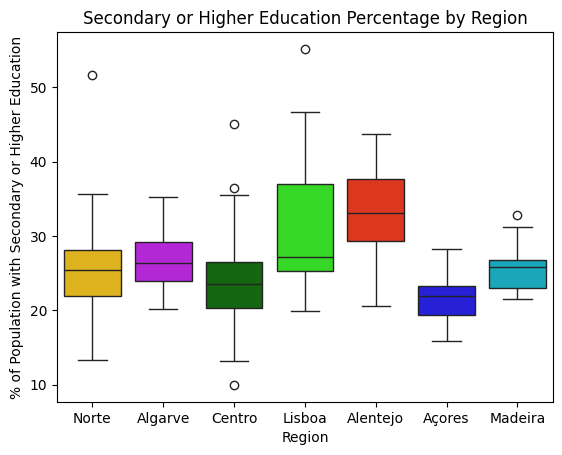

In [22]:
sns.boxplot(
    data=ed_sp_sum,
    x="NUTS2_region",
    y="secondary_plus_perc",
    hue="NUTS2_region",
    palette=region_colors
)
plt.title('Secondary or Higher Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with Secondary or Higher Education')
plt.show()

In [23]:
ed_all_ed_levels = ed_no_totals.loc[:, ['NutsID', 'region_name', 'el.education_level', 'ed_level_perc', 'NUTS2_region']]

In [24]:
ed_all_ed_levels.head()

,NutsID,region_name,el.education_level,ed_level_perc,NUTS2_region
308,1111601,Arcos de Valdevez,None,19.99,Norte
309,1111602,Caminha,None,14.57,Norte
310,1111603,Melgaço,None,14.66,Norte
311,1111604,Monção,None,14.19,Norte
312,1111605,Paredes de Coura,None,16.19,Norte


In [25]:
ed_split_perc = ed_sp_sum
ed_split_perc.head()

,NutsID,region_name,NUTS2_region,secondary_plus_perc
0,1111601,Arcos de Valdevez,Norte,18.55
1,1111602,Caminha,Norte,20.56
2,1111603,Melgaço,Norte,26.19
3,1111604,Monção,Norte,25.64
4,1111605,Paredes de Coura,Norte,18.44


## 3. Analysis of the Labour

In [26]:
labour4_df.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte
6,1111601,Arcos de Valdevez,4,2019,75,Regular,Norte
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,Norte
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,Norte
9,1111602,Caminha,4,2019,407,Total labour force in agriculture,Norte


In [27]:
lab_no_totals = labour4_df[labour4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals = labour4_df[(labour4_df['ltn.type_labour'] == 'Family labour force') |
                        (labour4_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour4_df[(labour4_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour4_df['ltn.type_labour'] != 'Family labour force') &
                              (labour4_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [28]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'NUTS2_region'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'NUTS2_region'])['l.value'].sum().reset_index()

In [29]:
def lab_percentage(row):
    if (row['ltn.type_labour'] == 'Family labour force') or (row['ltn.type_labour'] == 'Non-family labour force'):
        id = row['NutsID']
        value = row['l.value']
        total = lab_totals[lab_totals['NutsID'] == id]['l.value'].values[0]
    else:
        id = row['NutsID']
        value = row['l.value']
        total = lab_split_totals[lab_split_totals['NutsID'] == id]['l.value'].values[0]
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [30]:
lab_no_totals.loc[:, 'lab_level_perc'] = lab_no_totals.apply(lab_percentage, axis=1)

In [31]:
lab_nonfam = lab_no_totals[lab_no_totals['ltn.type_labour'] == 'Non-family labour force'].copy()

In [32]:
lab_no_totals.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region,lab_level_perc
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte,92.72
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte,50.14
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte,30.01
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte,12.61
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte,7.28
6,1111601,Arcos de Valdevez,4,2019,75,Regular,Norte,3.60
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,Norte,3.12
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,Norte,0.53
10,1111602,Caminha,4,2019,326,Family labour force,Norte,80.10
11,1111602,Caminha,4,2019,159,Holder,Norte,38.97


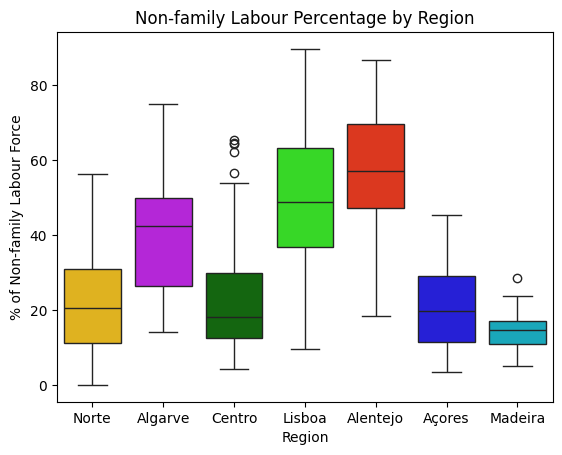

In [33]:
sns.boxplot(
    data=lab_nonfam,
    x="NUTS2_region",
    y="lab_level_perc",
    hue="NUTS2_region",
    palette=region_colors
)
plt.title('Non-family Labour Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Non-family Labour Force')
plt.show()

In [34]:
lab_split_perc = lab_nonfam.loc[:, ['NutsID', 'region_name', 'NUTS2_region', 'lab_level_perc']]
lab_split_perc.rename(columns={'lab_level_perc': 'non_family_perc'}, inplace=True)
lab_split_perc

,NutsID,region_name,NUTS2_region,non_family_perc
5,1111601,Arcos de Valdevez,Norte,7.28
14,1111602,Caminha,Norte,19.90
23,1111603,Melgaço,Norte,10.32
32,1111604,Monção,Norte,12.14
41,1111605,Paredes de Coura,Norte,5.84
...,...,...,...,...
2732,3003107,Ribeira Brava,Madeira,16.20
2741,3003108,Santa Cruz,Madeira,14.55
2750,3003109,Santana,Madeira,10.95
2759,3003110,São Vicente,Madeira,9.20


## 4. Analysis of the Production

In [35]:
prod4_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte


<Axes: xlabel='NUTS2_region', ylabel='p.value_eur'>

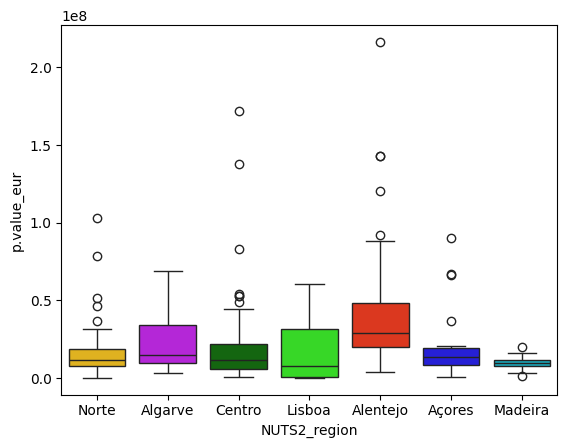

In [36]:
sns.boxplot(
    data=prod4_df,
    x="NUTS2_region",
    y="p.value_eur",
    hue="NUTS2_region",
    palette=region_colors
)

<Axes: xlabel='NUTS2_region', ylabel='p.area_ha'>

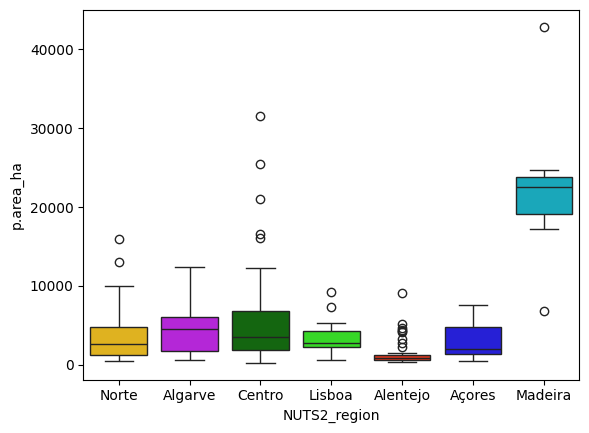

In [37]:
sns.boxplot(
    data=prod4_df,
    x="NUTS2_region",
    y="p.area_ha",
    hue="NUTS2_region",
    palette=region_colors
)

In [38]:
prod4_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte


In [39]:
prod_amounts = prod4_df.loc[:, ['NutsID', 'region_name', 'NUTS2_region', 'p.value_eur', 'p.area_ha']]
prod_amounts

,NutsID,region_name,NUTS2_region,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,Norte,11530051,551.5
1,1111602,Caminha,Norte,3015466,1058.6
2,1111603,Melgaço,Norte,5191947,494.9
3,1111604,Monção,Norte,9358899,1577.4
4,1111605,Paredes de Coura,Norte,5383718,1276.3
...,...,...,...,...,...
303,3003107,Ribeira Brava,Madeira,7273488,18408.3
304,3003108,Santa Cruz,Madeira,19846180,42876.4
305,3003109,Santana,Madeira,15924669,22574.1
306,3003110,São Vicente,Madeira,8351159,23241.6


## 5. Analysis of the Permanent Crops

In [40]:
permcrop4_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,613,1271,Total,Norte
1,1111601,Arcos de Valdevez,4,2019,27,67,Fresh fruit plantations (excluding citrus plan...,Norte
2,1111601,Arcos de Valdevez,4,2019,5,55,Citrus plantations,Norte
3,1111601,Arcos de Valdevez,4,2019,3,12,Fruit plantations (subtropical climate zones),Norte
4,1111601,Arcos de Valdevez,4,2019,90,129,Nuts plantations,Norte


In [41]:
permcrop4_df['pc.avg_area_hold'] = round(permcrop4_df['pc.area'] / permcrop4_df['pc.hold'], 3)

In [42]:
permcrop_total = permcrop4_df[permcrop4_df['pcn.crop_name'] == 'Total'].copy()

In [43]:
permcrop_total.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name,NUTS2_region,pc.avg_area_hold
0,1111601,Arcos de Valdevez,4,2019,613,1271,Total,Norte,0.482
8,1111602,Caminha,4,2019,73,228,Total,Norte,0.320
16,1111603,Melgaço,4,2019,719,746,Total,Norte,0.964
24,1111604,Monção,4,2019,1725,1568,Total,Norte,1.100
32,1111605,Paredes de Coura,4,2019,76,289,Total,Norte,0.263


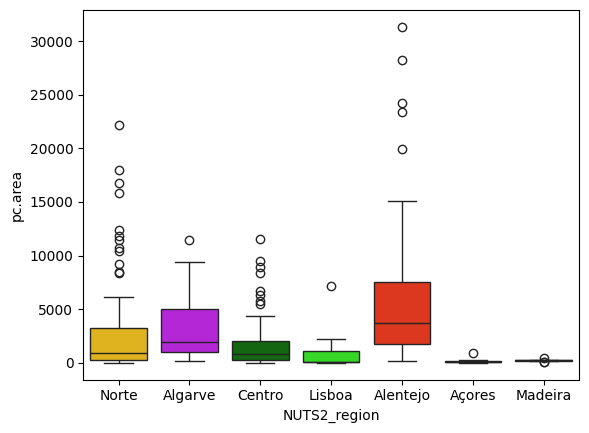

In [44]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.area",
    hue="NUTS2_region",
    palette=region_colors
)
plt.show()

<Axes: xlabel='NUTS2_region', ylabel='pc.hold'>

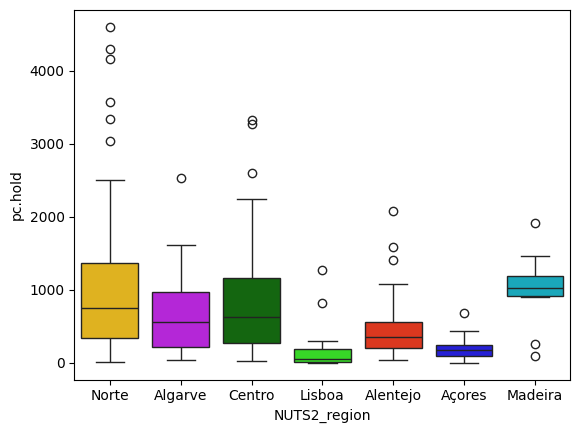

In [45]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.hold",
    hue="NUTS2_region",
    palette=region_colors
)

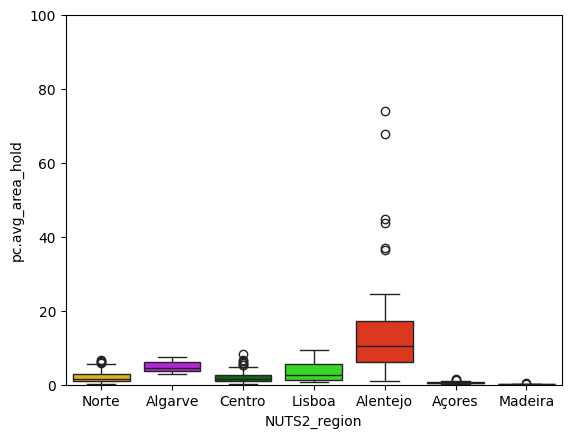

In [46]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.avg_area_hold",
    hue="NUTS2_region",
    palette=region_colors
)
plt.ylim(0, 100)
plt.show()

In [47]:
permcrop4_df.groupby('NUTS2_region').mean('pc.avg_area_hold')

,NUTS_level,pc.year,pc.area,pc.hold,pc.avg_area_hold
NUTS2_region,,,,,
Alentejo,4.0,2019.0,1545.450431,130.646552,10.580612
Algarve,4.0,2019.0,886.773438,333.289062,2.234211
Açores,4.0,2019.0,33.855263,71.118421,0.507200
Centro,4.0,2019.0,420.203750,258.900000,1.246676
Lisboa,4.0,2019.0,228.152778,63.868056,2.956895
Madeira,4.0,2019.0,52.795455,328.147727,0.166373
Norte,4.0,2019.0,744.040698,361.404070,1.181961


In [48]:
permcrop_amounts = permcrop_total.loc[:, ['NutsID', 
                                          'region_name', 
                                          'NUTS2_region', 
                                          'pc.area', 
                                          'pc.hold', 
                                          'pc.avg_area_hold']]
permcrop_amounts

,NutsID,region_name,NUTS2_region,pc.area,pc.hold,pc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,613,1271,0.482
8,1111602,Caminha,Norte,73,228,0.320
16,1111603,Melgaço,Norte,719,746,0.964
24,1111604,Monção,Norte,1725,1568,1.100
32,1111605,Paredes de Coura,Norte,76,289,0.263
...,...,...,...,...,...,...
2424,3003107,Ribeira Brava,Madeira,215,1058,0.203
2432,3003108,Santa Cruz,Madeira,183,1165,0.157
2440,3003109,Santana,Madeira,255,1027,0.248
2448,3003110,São Vicente,Madeira,225,902,0.249


## 6. Analysis of the Temporary Crops

In [49]:
tempcrop4_df.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,962,1142,Total,Norte
1,1111601,Arcos de Valdevez,4,2019,301,865,Cereals,Norte
2,1111601,Arcos de Valdevez,4,2019,12,114,Dried pulses,Norte
3,1111601,Arcos de Valdevez,4,2019,194,227,Temporary grasses and grazings,Norte
4,1111601,Arcos de Valdevez,4,2019,422,553,Fodder plants,Norte


In [50]:
tempcrop4_df['tc.avg_area_hold'] = round(tempcrop4_df['tc.area'] / tempcrop4_df['tc.hold'], 3)

In [51]:
tempcrop_total = tempcrop4_df[tempcrop4_df['tcn.crop_name'] == 'Total'].copy()
tempcrop_total.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name,NUTS2_region,tc.avg_area_hold
0,1111601,Arcos de Valdevez,4,2019,962,1142,Total,Norte,0.842
11,1111602,Caminha,4,2019,300,291,Total,Norte,1.031
22,1111603,Melgaço,4,2019,96,347,Total,Norte,0.277
33,1111604,Monção,4,2019,638,905,Total,Norte,0.705
44,1111605,Paredes de Coura,4,2019,1265,588,Total,Norte,2.151


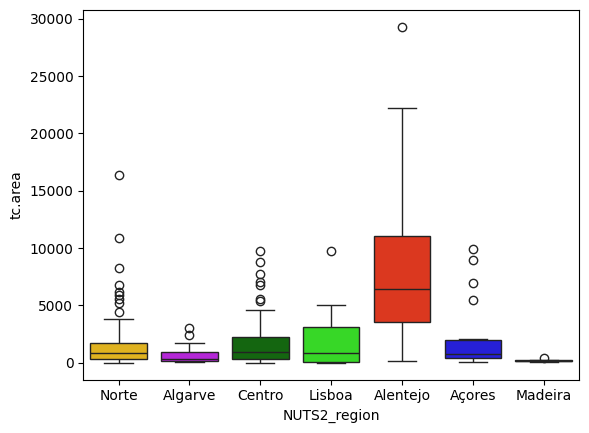

In [52]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.area",
    hue="NUTS2_region",
    palette=region_colors
)
# plt.ylim(0, 5000)
plt.show()

<Axes: xlabel='NUTS2_region', ylabel='tc.hold'>

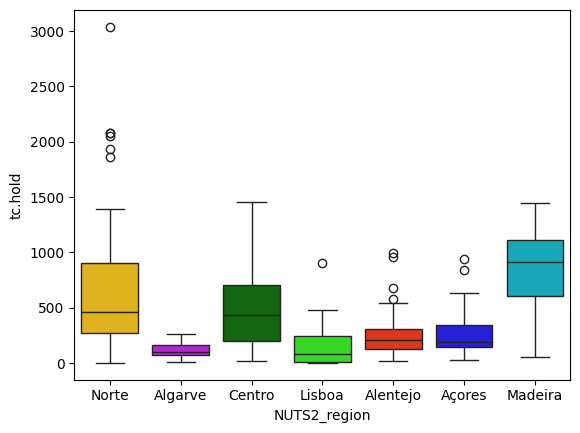

In [53]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.hold",
    hue="NUTS2_region",
    palette=region_colors
)

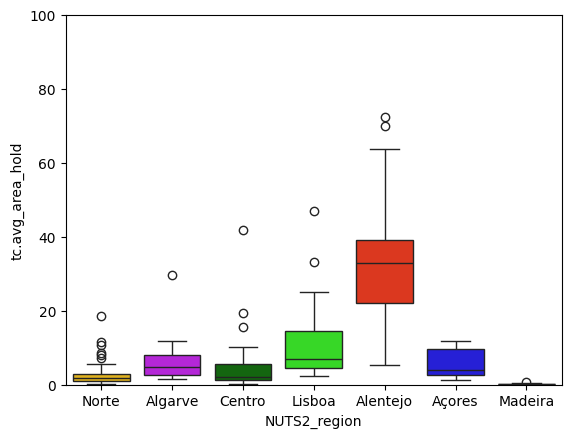

In [54]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.avg_area_hold",
    hue="NUTS2_region",
    palette=region_colors
)
plt.ylim(0, 100)
plt.show()

In [55]:
tempcrop4_df.groupby('NUTS2_region').mean('tc.avg_area_hold')

,NUTS_level,tc.year,tc.area,tc.hold,tc.avg_area_hold
NUTS2_region,,,,,
Alentejo,4.0,2019.0,1484.492163,54.018809,21.294992
Algarve,4.0,2019.0,137.698864,24.454545,4.339308
Açores,4.0,2019.0,409.784689,67.693780,2.116589
Centro,4.0,2019.0,312.521818,125.944545,2.085473
Lisboa,4.0,2019.0,351.621212,37.994949,8.235747
Madeira,4.0,2019.0,34.462810,243.719008,0.205789
Norte,4.0,2019.0,319.472516,165.324524,1.192511


In [56]:
tempcrop_amounts = tempcrop_total.loc[:, ['NutsID', 
                                          'region_name', 
                                          'NUTS2_region', 
                                          'tc.area', 
                                          'tc.hold', 
                                          'tc.avg_area_hold']]
tempcrop_amounts

,NutsID,region_name,NUTS2_region,tc.area,tc.hold,tc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,962,1142,0.842
11,1111602,Caminha,Norte,300,291,1.031
22,1111603,Melgaço,Norte,96,347,0.277
33,1111604,Monção,Norte,638,905,0.705
44,1111605,Paredes de Coura,Norte,1265,588,2.151
...,...,...,...,...,...,...
3333,3003107,Ribeira Brava,Madeira,167,985,0.170
3344,3003108,Santa Cruz,Madeira,248,1076,0.230
3355,3003109,Santana,Madeira,448,1332,0.336
3366,3003110,São Vicente,Madeira,194,880,0.220


## 7.  Merging dataframes of the sections 2-6

In [57]:
df_merged = ed_split_perc.merge(lab_split_perc[['NutsID', 'non_family_perc']], on='NutsID')
df_merged = df_merged.merge(prod_amounts[['NutsID', 'p.value_eur', 'p.area_ha']], on='NutsID', how='left')
df_merged = df_merged.merge(permcrop_amounts[['NutsID', 'pc.area', 'pc.hold', 'pc.avg_area_hold']], on='NutsID')
df_merged = df_merged.merge(tempcrop_amounts[['NutsID', 'tc.area', 'tc.hold', 'tc.avg_area_hold']], on='NutsID')

In [58]:
df_merged

,NutsID,region_name,NUTS2_region,secondary_plus_perc,non_family_perc,p.value_eur,p.area_ha,pc.area,pc.hold,pc.avg_area_hold,tc.area,tc.hold,tc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,18.55,7.28,11530051,551.5,613,1271,0.482,962,1142,0.842
1,1111602,Caminha,Norte,20.56,19.90,3015466,1058.6,73,228,0.320,300,291,1.031
2,1111603,Melgaço,Norte,26.19,10.32,5191947,494.9,719,746,0.964,96,347,0.277
3,1111604,Monção,Norte,25.64,12.14,9358899,1577.4,1725,1568,1.100,638,905,0.705
4,1111605,Paredes de Coura,Norte,18.44,5.84,5383718,1276.3,76,289,0.263,1265,588,2.151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3003107,Ribeira Brava,Madeira,22.28,16.20,7273488,18408.3,215,1058,0.203,167,985,0.170
304,3003108,Santa Cruz,Madeira,31.25,14.55,19846180,42876.4,183,1165,0.157,248,1076,0.230
305,3003109,Santana,Madeira,25.88,10.95,15924669,22574.1,255,1027,0.248,448,1332,0.336
306,3003110,São Vicente,Madeira,23.86,9.20,8351159,23241.6,225,902,0.249,194,880,0.220


## 8. Running a PCA with the dataframe from section 7

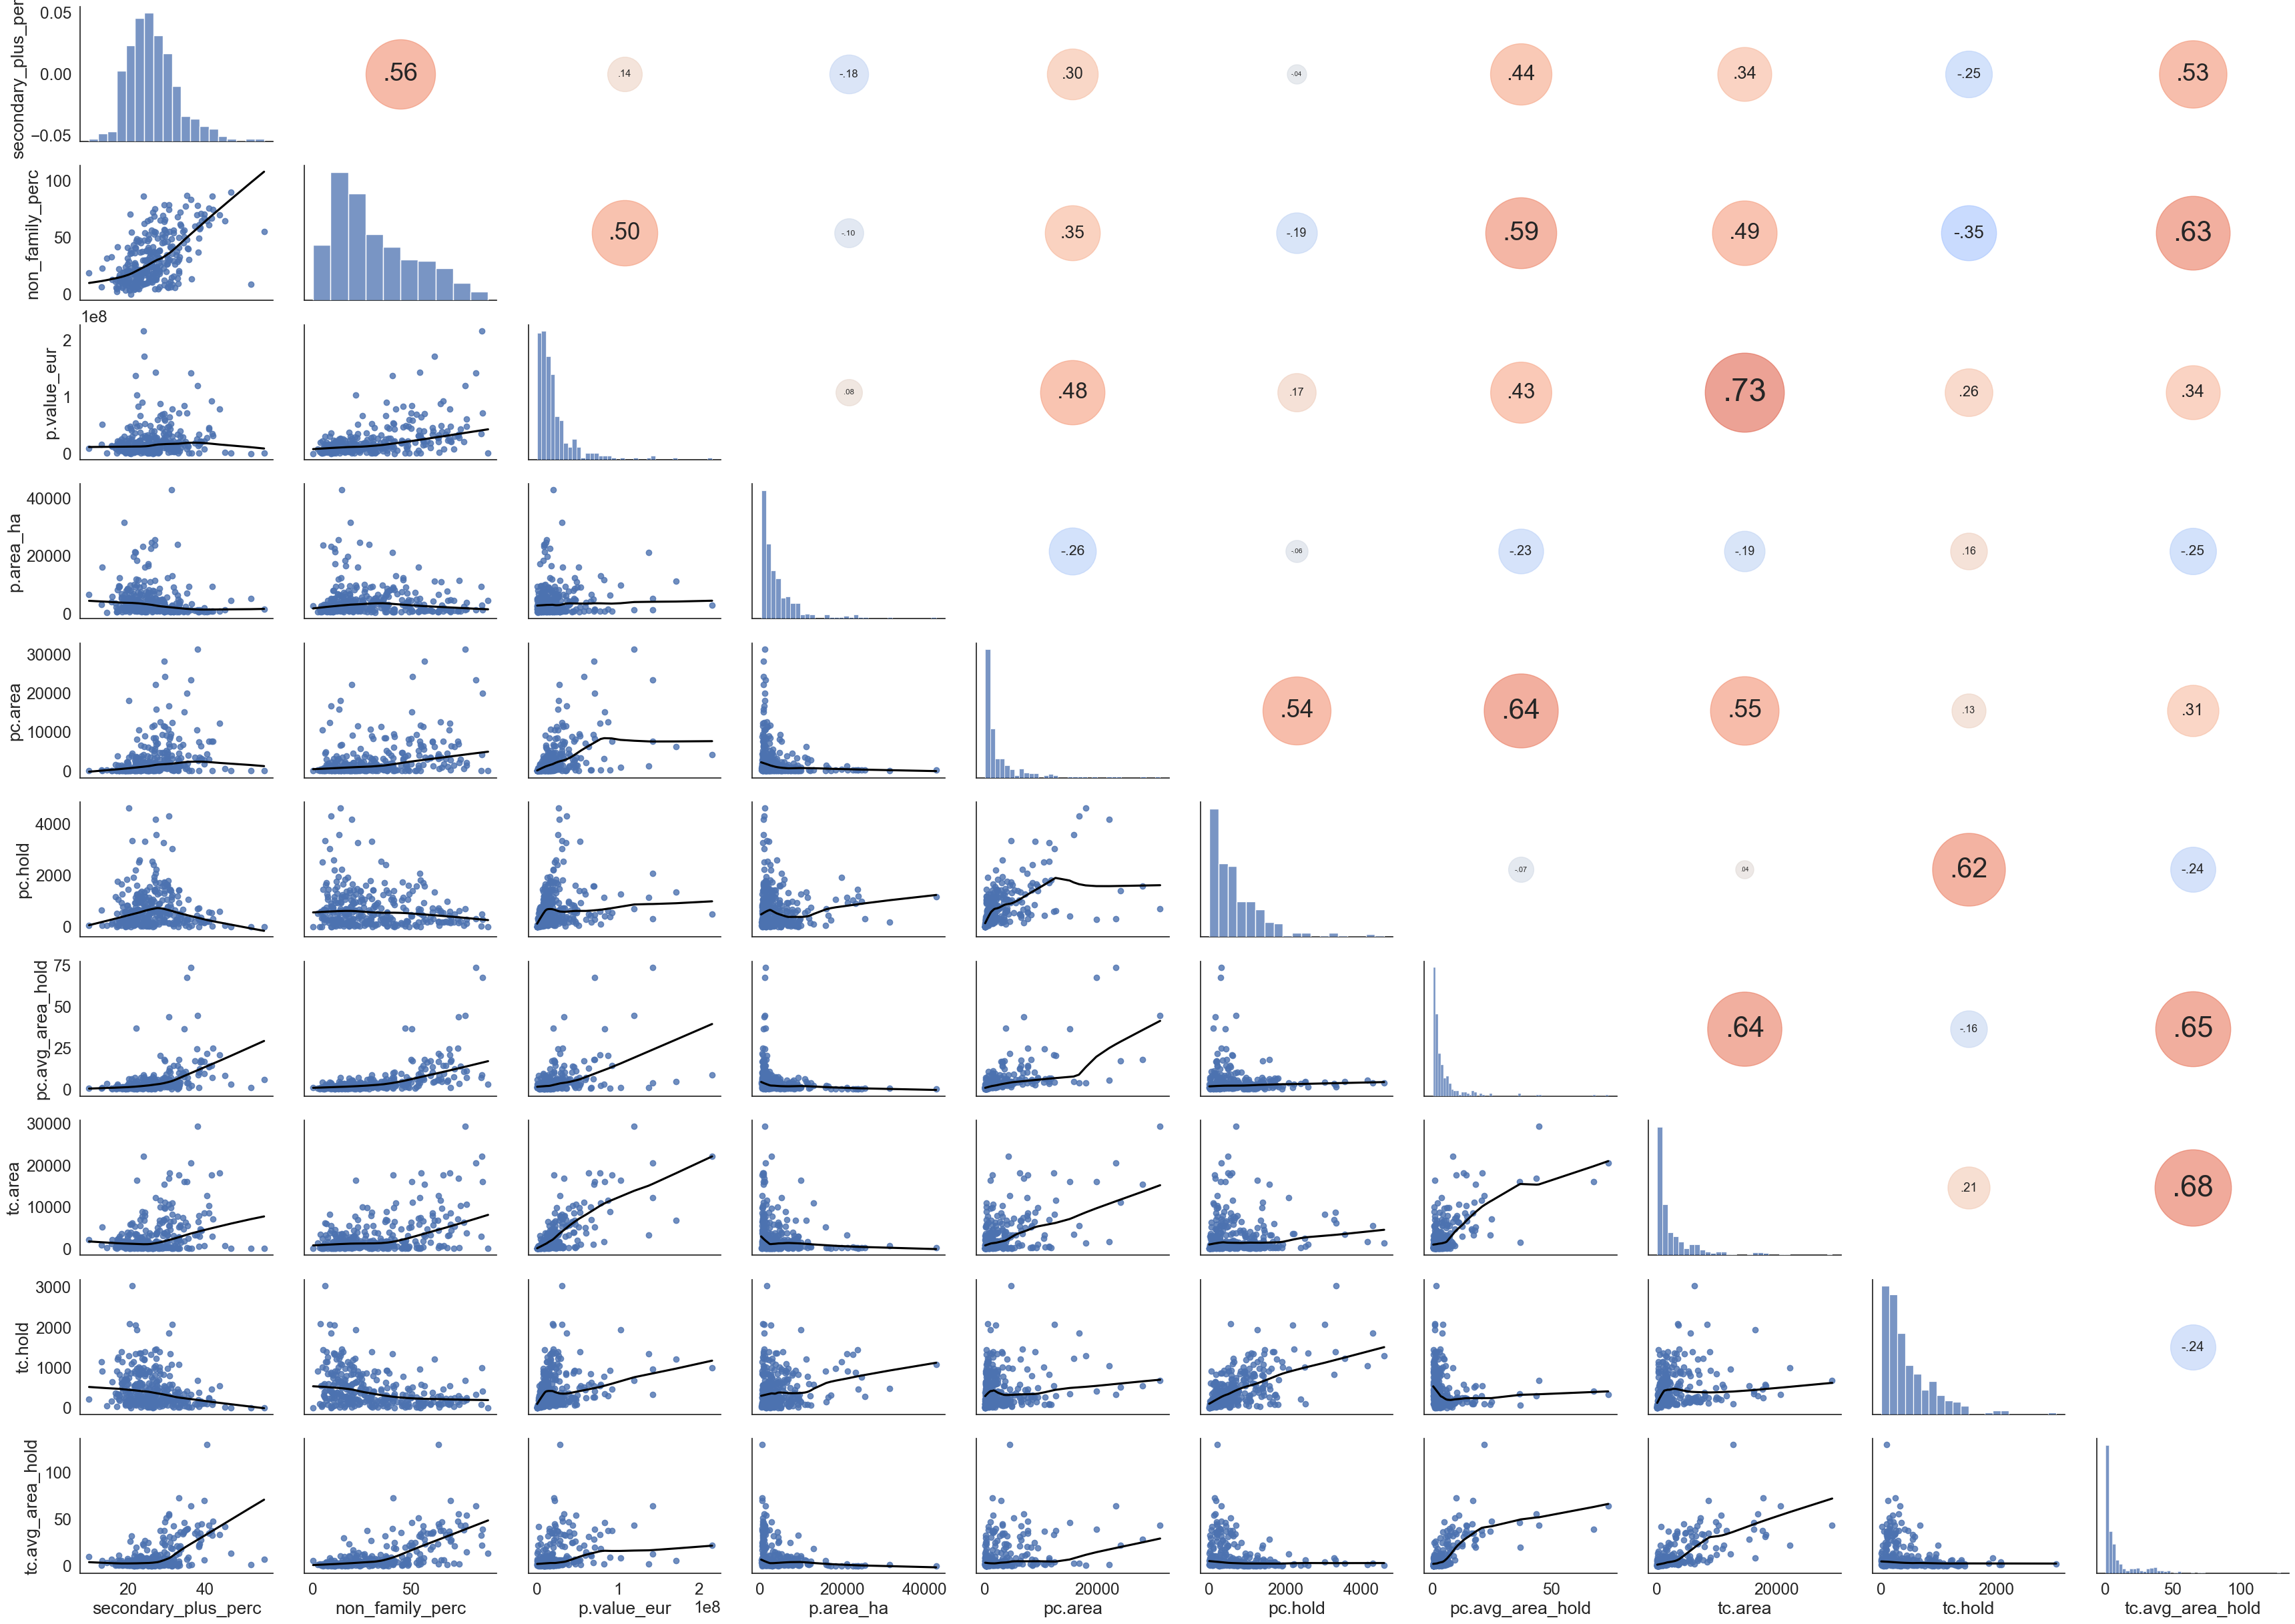

In [59]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df_merged, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [60]:
df_merged_nona = df_merged.dropna()

In [61]:
df_scaled = StandardScaler().fit_transform(df_merged_nona.iloc[:, 3:])

pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [62]:
def biplot(score,coef,hue,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    sns.scatterplot(x=xs * scalex,
                    y=ys * scaley,
                    hue=hue,
                    s=8, 
                    color='blue',
                    palette=region_colors) # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'red', 
                 ha = 'center', 
                 va = 'center',
                 fontsize = 'xx-small') # variable labels for each arrow

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
    plt.title('Biplot of PCA for all variables')
    plt.figure()

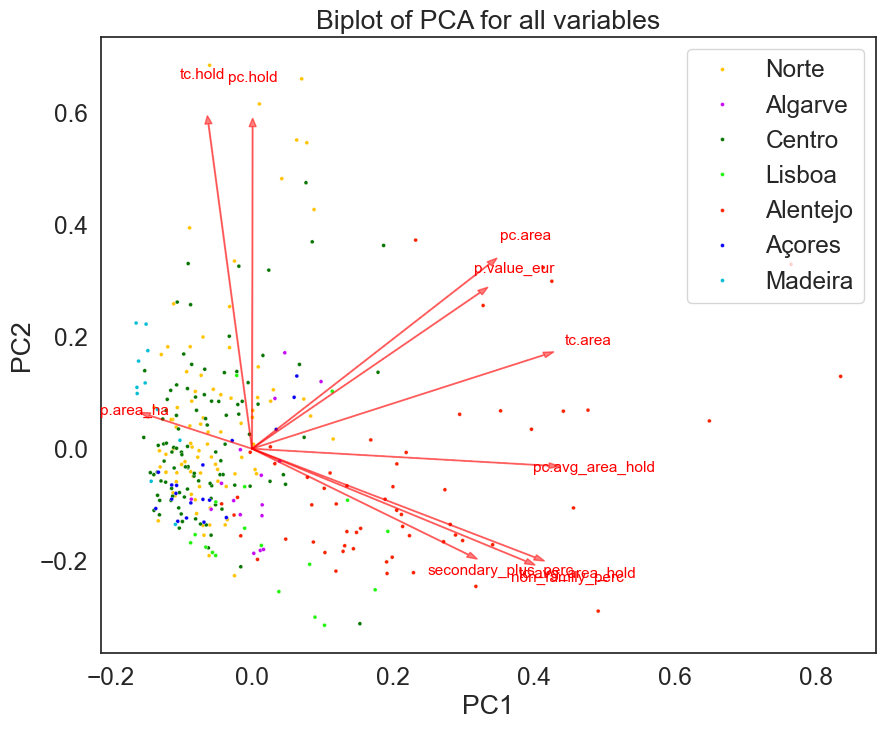

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       df_merged_nona['NUTS2_region'].tolist(),
       list(df_merged_nona.columns[3:]))
plt.show()

## 9. Run a analysis of the Production vs Education

In [64]:
df_prod_ed = df_merged[['NutsID', 'region_name', 'NUTS2_region', 'secondary_plus_perc', 'p.value_eur', 'p.area_ha']]
df_prod_ed.head()

,NutsID,region_name,NUTS2_region,secondary_plus_perc,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,Norte,18.55,11530051,551.5
1,1111602,Caminha,Norte,20.56,3015466,1058.6
2,1111603,Melgaço,Norte,26.19,5191947,494.9
3,1111604,Monção,Norte,25.64,9358899,1577.4
4,1111605,Paredes de Coura,Norte,18.44,5383718,1276.3


<Axes: xlabel='p.area_ha', ylabel='secondary_plus_perc'>

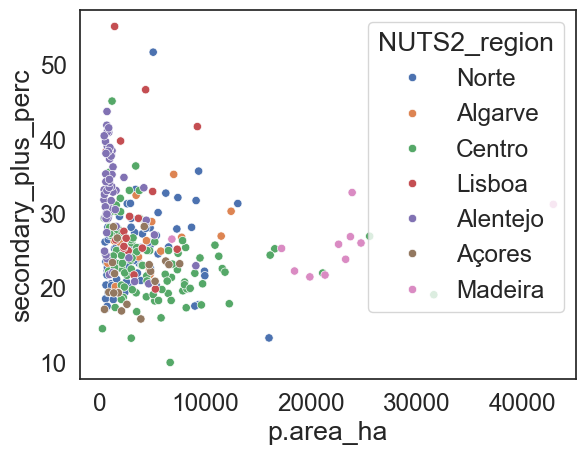

In [65]:
sns.scatterplot(
    data = df_prod_ed,
    x = 'p.area_ha',
    y = 'secondary_plus_perc',
    hue = 'NUTS2_region'
)

<Axes: xlabel='p.value_eur', ylabel='secondary_plus_perc'>

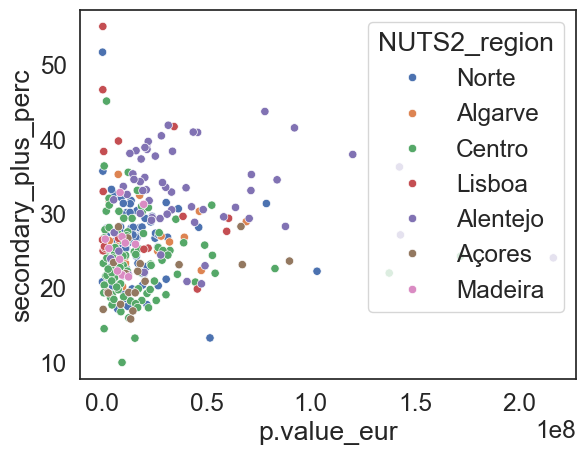

In [66]:
sns.scatterplot(
    data = df_prod_ed,
    x = 'p.value_eur',
    y = 'secondary_plus_perc',
    hue = 'NUTS2_region'
)

                             OLS Regression Results                            
Dep. Variable:     secondary_plus_perc   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.029
Method:                  Least Squares   F-statistic:                     10.14
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):            0.00160
Time:                         20:31:49   Log-Likelihood:                -1003.3
No. Observations:                  307   AIC:                             2011.
Df Residuals:                      305   BIC:                             2018.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4257      0.469     58.45

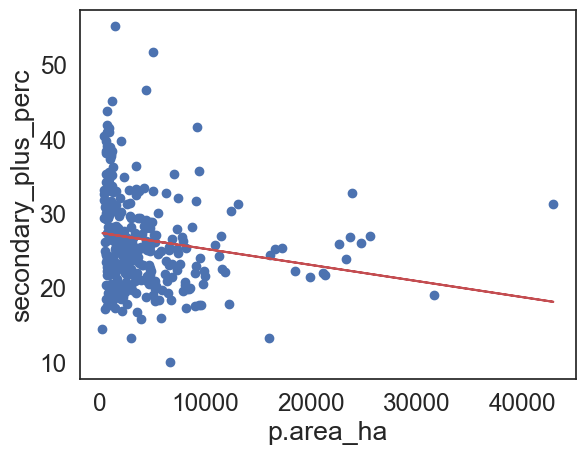

In [67]:
# Define the dependent variable (y) and independent variable (x)
y = df_merged_nona['secondary_plus_perc']
x = df_merged_nona['p.area_ha']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.scatter(x.loc[:, 'p.area_ha'], y)  # scatter plot of data points
plt.xlabel('p.area_ha')
plt.ylabel('secondary_plus_perc')

# Plot the regression line
plt.plot(x.loc[:, 'p.area_ha'], model.fittedvalues, 'r')  # regression line

plt.show()

                             OLS Regression Results                            
Dep. Variable:     secondary_plus_perc   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     5.716
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):             0.0174
Time:                         20:31:49   Log-Likelihood:                -1005.5
No. Observations:                  307   AIC:                             2015.
Df Residuals:                      305   BIC:                             2022.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.7635      0.474     54

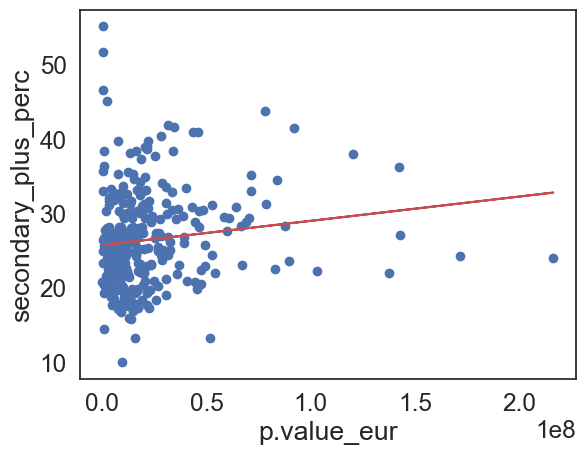

In [68]:
# Define the dependent variable (y) and independent variable (x)
y = df_merged_nona['secondary_plus_perc']
x = df_merged_nona['p.value_eur']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.scatter(x.loc[:, 'p.value_eur'], y)  # scatter plot of data points
plt.xlabel('p.value_eur')
plt.ylabel('secondary_plus_perc')

# Plot the regression line
plt.plot(x.loc[:, 'p.value_eur'], model.fittedvalues, 'r')  # regression line

plt.show()

## 10. Run analysis of socio-economic indicators vs avg_area_hold

In [69]:
# Define the inputs (independent variables)
X = df_merged_nona[['pc.avg_area_hold', 'tc.avg_area_hold']]

y1 = df_merged_nona['secondary_plus_perc']
X = sm.add_constant(X)

# Perform OLS regression for the first output
model1 = sm.OLS(y1, X).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     secondary_plus_perc   R-squared:                       0.295
Model:                             OLS   Adj. R-squared:                  0.290
Method:                  Least Squares   F-statistic:                     63.49
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):           9.09e-24
Time:                         20:31:49   Log-Likelihood:                -954.76
No. Observations:                  307   AIC:                             1916.
Df Residuals:                      304   BIC:                             1927.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.1282   

In [70]:
# Perform OLS regression for the second output
y2 = df_merged_nona['non_family_perc']
model2 = sm.OLS(y2, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        non_family_perc   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     125.9
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.45e-40
Time:                        20:31:49   Log-Likelihood:                -1273.4
No. Observations:                 307   AIC:                             2553.
Df Residuals:                     304   BIC:                             2564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.6174      1.058  